# **MNIST Digit Classification Project**

In [1]:
!pip install tensorflow

In [4]:
import tensorflow as tf  # Main deep learning library
from tensorflow.keras import layers, models  # Keras API for building layers
import numpy as np  # Numerical computing
import matplotlib.pyplot as plt  # Plotting graphs/images

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:

### ** Load and Prepare Data**
# MNIST dataset contains 60k training + 10k test grayscale images (28x28 pixels)

In [5]:
# Load MNIST dataset (automatically downloaded)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# The MNIST dataset is not stored as image files but as numerical arrays.

# Each image is a 28x28 grid of pixel values (0-255).

# This array format is ideal for deep learning frameworks like TensorFlow.

In [ ]:
# Training data: (60000, 28, 28) → 60,000 images, each 28x28 pixels.

# Test data: (10000, 28, 28) → 10,000 images.

## **normalize**

In [6]:
# Normalize pixel values from [0, 255] to [0, 1] for faster training
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# Reshape data to add channel dimension (required for CNN input)
# Original shape: (60000, 28, 28) → New shape: (60000, 28, 28, 1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
# -1 acts as a wildcard for NumPy/TensorFlow to auto-compute the missing dimension.
# This ensures the code works even if the dataset size changes (e.g., using a subset of 50,000 images).

In [8]:
# Convert labels to one-hot encoding (e.g., "5" becomes [0,0,0,0,0,1,0,0,0,0])
# Converts integer labels (e.g.,2) into one-hot encoded vectors (e.g., [0,0,1,0,0,0,0,0,0,0]).
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [9]:
# ## **Build the CNN Model**

model = models.Sequential([  # Sequential model (linear stack of layers)
    # First Conv-Pool Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Reduces spatial size by 50%

    # Second Conv-Pool Block
    layers.Conv2D(64, (3, 3), activation='relu'),  # 64 filters
    layers.MaxPooling2D((2, 2)),

    layers.Dropout(0.25),  # Randomly disable 25% neurons to prevent overfitting

    # Classifier Head
    layers.Flatten(),  # Convert 2D feature maps to 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dense(10, activation='softmax')  # Output layer: probability distribution over 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Layer 1: Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))
# Scans the 28x28 grayscale image with 32 different 3x3 filters to detect patterns (edges, curves)
# relu activation adds non-linearity (only keeps positive values)

# Layer 2: MaxPooling2D((2,2))
# Shrinks the image by 50% (from 28x28 → 14x14)
# Keeps only the brightest/most obvious features in each 2x2 grid

# Layer 3: Conv2D(64, (3,3), activation='relu')
# Uses 64 filters to detect complex patterns (combinations of edges, like loops or corners).
# Deeper layers recognize higher-level features (e.g., the curve of a "9" vs. the straight line of a "1")

# Layer 4: MaxPooling2D((2,2))
# Further shrinks the image (14x14 → 7x7)

# Layer 5: Dropout(0.25)
# Randomly turns off 25% of neurons during training.
# Prevents the model from "memorizing" the training data (reduces overfitting).
# Forces the network to learn redundant patterns.

# Layer 6: Flatten()
# Converts the 7x7 feature maps into a 1D list of numbers.
# Example: 7x7x64 → 3136 numbers

# Layer 7: Dense(128, activation='relu')
# A fully connected layer with 128 neurons
# Combines features to understand relationships (e.g., "a 8 has two loops").
# Acts like a human brain making decisions based on evidence

# Layer 8: Dense(10, activation='softmax')
# Outputs probabilities for 10 classes (digits 0-9)


In [10]:
# Show model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#It provides a concise overview of your model's architecture.

In [11]:
# ## ** Compile and Train the Model**

model.compile(
    optimizer='adam',  # Adaptive learning rate optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)
#Categorical Crossentropy: This loss function is specifically designed for multi-class classification problems where the labels are one-hot encoded.

In [13]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,  # 64 samples per gradient update
    validation_split=0.2  # Use 20% of training data for validation
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9860 - loss: 0.0439 - val_accuracy: 0.9886 - val_loss: 0.0382
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9898 - val_loss: 0.0378
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9908 - loss: 0.0271 - val_accuracy: 0.9889 - val_loss: 0.0391
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9889 - val_loss: 0.0452
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9945 - loss: 0.0161 - val_accuracy: 0.9893 - val_loss: 0.0397
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9955 - loss: 0.0131 - val_accuracy: 0.9908 - val_loss: 0.0381
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9962 - loss: 0.0114 - 

In [14]:
# ## ** Evaluate Performance**

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 99.14%


Text(0.5, 1.0, 'Accuracy vs. Epochs')

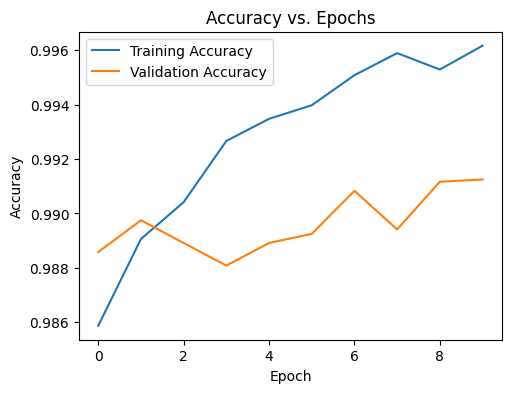

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

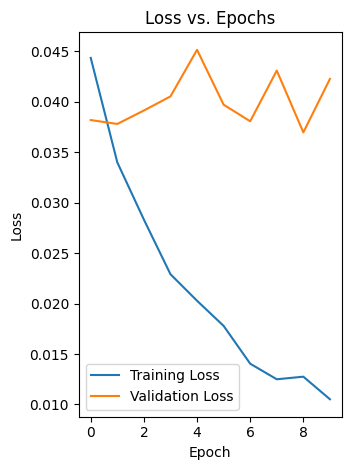

In [16]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()

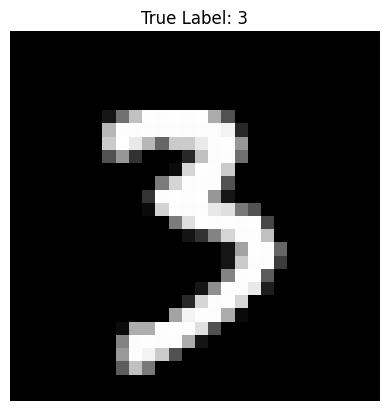

In [19]:
# Select a random test image
sample_idx = 30  # Change this number to test different images
sample_image = test_images[sample_idx].reshape(28, 28)  # Remove channel dim for plotting

# Show the image
plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {np.argmax(test_labels[sample_idx])}")
plt.axis('off')
plt.show()

In [20]:
# Predict the class
prediction = model.predict(test_images[sample_idx].reshape(1, 28, 28, 1))  # Add batch dimension
predicted_label = np.argmax(prediction)
print(f"Predicted Digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Digit: 3


In [ ]:
# ## **Step 8: Save the Model**
model.save('mnist_cnn.h5')  # Save as HDF5 file for later use
# Hierarchical Data Format is a set of file formats designed to store and organize large amounts of data.